## Libraries

In [38]:
import pandas as pd
import numpy as np
import scipy.stats as stat

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18.5 * 0.65, 10.5 * 0.65)

from mlgear.utils import show, display_columns
from surveyweights import run_weighting_iteration, run_weighting_scheme, normalize_weights, get_census

## Load Processed Data

In [39]:
survey = pd.read_csv('responses_processed.csv')

## US National Weighting

In [40]:
demographics = ['gender', 'race', 'education', 'urban_rural', 'income', 'age', 'vote2016', 'region',
                'gss_trust', 'gss_bible', 'gss_spanking']
run_weighting_iteration(survey, weigh_on=demographics, census='US')

## gender ##
Female               1.178275
Male                 1.180485
Other                0.472380
Prefer not to say    1.168861
dtype: float64
ERROR: 0.184476269208447
-
-
## race ##
Asian or Asian American      0.333217
Black or African American    1.387757
Hispanic or Latino           1.752834
Other                        0.650321
White or Caucasian           0.875871
dtype: float64
ERROR: 0.2884959321058848
-
-
## education ##
Completed graduate school     0.220876
Graduated from college        0.180412
Graduated from high school    0.749039
Less than high school         3.535978
Some college, no degree       0.313695
dtype: float64
ERROR: 0.718995818189874
-
-
## urban_rural ##
Rural       1.130103
Suburban    0.968004
Urban       0.901893
dtype: float64
ERROR: 0.06566875674077151
-
-
## income ##
Between $100,000 and $150,000    1.080109
Between $15,000 and $49,999      0.702520
Between $50,000 and $74,999      0.749527
Between $75,000 and $99,999      0.827474
Over $150,000 

{'errors': [0.184476269208447,
  0.2884959321058848,
  0.718995818189874,
  0.06566875674077151,
  0.3787356964585124,
  0.6655532921461068,
  0.24460372013743586,
  0.20367626470571626,
  0.05027565327808684,
  0.49337511576300097,
  0.491883765159451],
 'error_table': {'education': 2.5359784099746796,
  'age': 1.5277800465421456,
  'income': 1.2819124325543152,
  'gss_bible': 1.0498655335928024,
  'race': 0.7528338304204403,
  'vote2016': 0.6620004008140645,
  'gss_spanking': 0.6224214714931966,
  'gender': 0.5276202372670243,
  'region': 0.4246016641750081,
  'urban_rural': 0.13010320908589557,
  'gss_trust': 0.05865537342798921},
 'weights': {'gender': Female               1.178275
  Male                 1.180485
  Other                0.472380
  Prefer not to say    1.168861
  dtype: float64,
  'race': Asian or Asian American      0.333217
  Black or African American    1.387757
  Hispanic or Latino           1.752834
  Other                        0.650321
  White or Caucasian   

In [41]:
output = run_weighting_scheme(survey, iters=50, weigh_on=demographics, census='US', verbose=1, early_terminate=False)

ITER 1/1 - initialization - ERROR 50
ITER 2/50 - weight gender - ERROR 3.785740283893287
ITER 3/50 - weight race - ERROR 3.5902085971467197
ITER 4/50 - weight education - ERROR 3.3374562621457935
ITER 5/50 - weight urban_rural - ERROR 2.738343403787317
ITER 6/50 - weight income - ERROR 2.711111258984514
ITER 7/50 - weight age - ERROR 2.6994634556446426
ITER 8/50 - weight vote2016 - ERROR 2.6925709482558076
ITER 9/50 - weight region - ERROR 2.2245207318012237
ITER 10/50 - weight gss_trust - ERROR 1.74506528489569
ITER 11/50 - weight gss_bible - ERROR 1.6357789069243371
ITER 12/50 - weight gss_spanking - ERROR 1.4421324633846475
ITER 13/50 - weight gender - ERROR 1.2023924901235976
ITER 14/50 - weight region - ERROR 1.0533028750886309
ITER 15/50 - weight education - ERROR 0.9266562105963254
ITER 16/50 - weight vote2016 - ERROR 0.7087915809583842
ITER 17/50 - weight race - ERROR 0.5608994418118916
ITER 18/50 - weight region - ERROR 0.5031014923958272
ITER 19/50 - weight age - ERROR 0.6643

In [42]:
survey = output['final_df']
_ = run_weighting_iteration(survey, weigh_on=demographics, census='US')

## gender ##
Female               1.002508
Male                 0.994053
Other                0.994926
Prefer not to say    1.008513
dtype: float64
ERROR: 0.0042184376889861566
-
-
## race ##
Asian or Asian American      1.009731
Black or African American    0.997755
Hispanic or Latino           1.003034
Other                        0.997009
White or Caucasian           0.992471
dtype: float64
ERROR: 0.006944254939915727
-
-
## education ##
Completed graduate school     0.999048
Graduated from college        0.997424
Graduated from high school    0.999930
Less than high school         1.005324
Some college, no degree       0.998274
dtype: float64
ERROR: 0.0017468454774673683
-
-
## urban_rural ##
Rural       0.992383
Suburban    0.999014
Urban       1.008603
dtype: float64
ERROR: 0.004306778714232753
-
-
## income ##
Between $100,000 and $150,000    1.002978
Between $15,000 and $49,999      0.992404
Between $50,000 and $74,999      0.998029
Between $75,000 and $99,999      0.997671
Ove

## Likely Voter

In [43]:
survey['lv_index'] = 0
survey['rv_index'] = 0
survey.loc[survey['lv_thought'] == 'Quite a lot', 'lv_index'] += 1
survey.loc[survey['lv_thought'] == 'Some', 'lv_index'] += 0.7
survey.loc[(survey['lv_plan_vote'] == 'Yes'), 'lv_index'] += 1
survey.loc[(survey['lv_likely'] == 'Very likely'), 'lv_index'] += 1
survey.loc[(survey['lv_likely'] == 'Likely'), 'lv_index'] += 0.7
survey.loc[(survey['lv_likely'] == 'Somewhat likely'), 'lv_index'] += 0.4
survey.loc[(survey['lv_likely'] == 'Neither likely nor unlikely'), 'lv_index'] += 0.2
survey.loc[(survey['lv_likely'] == 'Somewhat unlikely'), 'lv_index'] += 0.1
survey.loc[(survey['lv_likely'] == 'Unlikely'), 'lv_index'] += 0.05
survey.loc[(survey['age'] == '18-24'), 'lv_index'] += 1
survey.loc[(survey['age'] != '18-24') & (survey['vote2016'] != 'Did not vote'), 'lv_index'] += 1
survey.loc[survey['vote_method_plan'].isin(['In person on election day',
                                            'In person before election day',
                                            'By mail, and I’ve already requested and received my mail-in ballot']),
           'lv_index'] += 1
survey.loc[survey['vote_method_plan'] == 'By mail, and I’ve already requested my mail-in ballot', 'lv_index'] += 0.8
survey.loc[survey['vote_method_plan'] == 'By mail, but I haven\'t requested my mail-in ballot yet', 'lv_index'] += 0.4
survey.loc[survey['lv_already_voted'] == 'Yes', 'lv_index'] = survey['lv_index'].max()
survey.loc[~(survey['lv_registered'] == 'Yes'), 'lv_index'] = 0
survey.loc[(survey['lv_registered'] == 'Yes'), 'rv_index'] = 1

# https://www.pewresearch.org/methods/2016/01/07/measuring-the-likelihood-to-vote/
perry_gallup_loadings = {7: 0.83, 6: 0.63, 5: 0.59, 4: 0.4, 3: 0.34, 2: 0.23, 1: 0.13, 0: 0.11}
survey['lv_index'] = survey['lv_index'].apply(lambda l: perry_gallup_loadings[int(np.round(l * 2 * 0.7))])

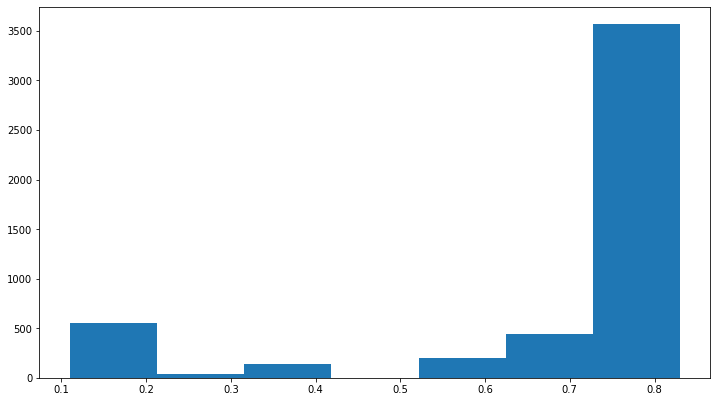

In [44]:
plt.hist(survey['lv_index'], bins=7)
plt.show()

In [45]:
survey['lv_index'].value_counts()

0.83    3565
0.11     509
0.63     437
0.59     203
0.40      72
0.34      63
0.23      42
0.13      42
Name: lv_index, dtype: int64

In [46]:
survey['lv_weight'] = normalize_weights(survey['weight'] * survey['lv_index'])
survey['rv_weight'] = normalize_weights(survey['weight'] * survey['rv_index'])
print(survey['lv_weight'].mean())
print(survey['rv_weight'].mean())

1.0
1.0


## Alternative Weighting

In [47]:
census = get_census()
survey_ = survey.copy()
survey_['social_twitter'] = survey_['social_twitter'].astype(str)
census['social_twitter'] = {'False': 0.8, 'True': 0.22}
survey_['social_fb'] = survey_['social_fb'].astype(str)
census['social_fb'] = {'False': 0.31, 'True': 0.69}
census

{'age': {'18-24': 0.1304, '25-44': 0.3505, '45-64': 0.3478, '65+': 0.1713},
 'education': {'Completed graduate school': 0.1204,
  'Graduated from college': 0.2128,
  'Some college, no degree': 0.2777,
  'Graduated from high school': 0.2832,
  'Less than high school': 0.106},
 'gender': {'Female': 0.507, 'Male': 0.487, 'Other': 0.006},
 'income': {'Under $15,000': 0.102,
  'Between $15,000 and $49,999': 0.297,
  'Between $50,000 and $74,999': 0.172,
  'Between $75,000 and $99,999': 0.125,
  'Between $100,000 and $150,000': 0.149,
  'Over $150,000': 0.155},
 'race': {'White or Caucasian': 0.634,
  'Asian or Asian American': 0.059,
  'Black or African American': 0.134,
  'Hispanic or Latino': 0.153,
  'Other': 0.02},
 'urban_rural': {'Suburban': 0.55, 'Urban': 0.31, 'Rural': 0.14},
 'region': {'Midwest': 0.2149,
  'Mountains': 0.0539,
  'Northeast': 0.1604,
  'Pacific': 0.1602,
  'South': 0.218,
  'Southwest': 0.0531,
  'Southeast': 0.1398},
 'vote2016': {'Hillary Clinton': 0.482, 'Donald

In [48]:
demographics = ['gender', 'race', 'education', 'urban_rural', 'income', 'age', 'vote2016', 'region',
                'gss_trust', 'gss_bible', 'gss_spanking', 'social_twitter', 'social_fb']
run_weighting_iteration(survey_, weigh_on=demographics, census='US')

## gender ##
Female               1.002508
Male                 0.994053
Other                0.994926
Prefer not to say    1.008513
dtype: float64
ERROR: 0.0042184376889861566
-
-
## race ##
Asian or Asian American      1.009731
Black or African American    0.997755
Hispanic or Latino           1.003034
Other                        0.997009
White or Caucasian           0.992471
dtype: float64
ERROR: 0.006944254939915727
-
-
## education ##
Completed graduate school     0.999048
Graduated from college        0.997424
Graduated from high school    0.999930
Less than high school         1.005324
Some college, no degree       0.998274
dtype: float64
ERROR: 0.0017468454774673683
-
-
## urban_rural ##
Rural       0.992383
Suburban    0.999014
Urban       1.008603
dtype: float64
ERROR: 0.004306778714232753
-
-
## income ##
Between $100,000 and $150,000    1.002978
Between $15,000 and $49,999      0.992404
Between $50,000 and $74,999      0.998029
Between $75,000 and $99,999      0.997671
Ove

{'errors': [0.0042184376889861566,
  0.006944254939915727,
  0.0017468454774673683,
  0.004306778714232753,
  0.00397718408966927,
  0.0005620349595842437,
  0.0031365564915348,
  6.759914609292764e-16,
  0.005517640600685924,
  0.004387346104589487,
  0.004074625360027654,
  0.54691404677961,
  0.13055074412059817],
 'error_table': {'social_twitter': 0.5469140467796101,
  'social_fb': 0.1305507441205982,
  'race': 0.00973114016664578,
  'income': 0.009239304415653793,
  'urban_rural': 0.008602803680968663,
  'gender': 0.008513009970171792,
  'gss_trust': 0.008119164844067273,
  'vote2016': 0.007096361458112321,
  'gss_bible': 0.00584002054675814,
  'gss_spanking': 0.005381518664206997,
  'education': 0.005324240464573693,
  'age': 0.0006525380212172305,
  'region': 1.3322676295501878e-15},
 'weights': {'gender': Female               1.002508
  Male                 0.994053
  Other                0.994926
  Prefer not to say    1.008513
  dtype: float64,
  'race': Asian or Asian Americ

In [49]:
output = run_weighting_scheme(survey_, iters=50, weigh_on=demographics, census='US', verbose=1, early_terminate=False)

ITER 1/1 - initialization - ERROR 50
ITER 2/50 - weight gender - ERROR 4.479561614296531
ITER 3/50 - weight race - ERROR 4.280541306003009
ITER 4/50 - weight education - ERROR 4.054256975231975
ITER 5/50 - weight urban_rural - ERROR 3.5298624586936307
ITER 6/50 - weight income - ERROR 3.505682837479146
ITER 7/50 - weight age - ERROR 3.4089260235331924
ITER 8/50 - weight vote2016 - ERROR 3.2997157828367354
ITER 9/50 - weight region - ERROR 2.8127680821439167
ITER 10/50 - weight gss_trust - ERROR 2.3434827970220766
ITER 11/50 - weight gss_bible - ERROR 2.2148043322962208
ITER 12/50 - weight gss_spanking - ERROR 2.1026822200346773
ITER 13/50 - weight social_twitter - ERROR 2.2277282627966715
ITER 14/50 - weight social_fb - ERROR 2.1161184441166654
ITER 15/50 - weight region - ERROR 1.6256620777573172
ITER 16/50 - weight gender - ERROR 1.1185193443538268
ITER 17/50 - weight education - ERROR 1.0643284183210926
ITER 18/50 - weight race - ERROR 0.994717886170391
ITER 19/50 - weight region - 

In [50]:
survey_ = output['final_df']
_ = run_weighting_iteration(survey_, weigh_on=demographics, census='US')

## gender ##
Female               0.996755
Male                 0.994221
Other                1.007366
Prefer not to say    1.001657
dtype: float64
ERROR: 0.004518629627617977
-
-
## race ##
Asian or Asian American      1.001232
Black or African American    0.997843
Hispanic or Latino           1.001079
Other                        0.999277
White or Caucasian           1.000569
dtype: float64
ERROR: 0.0008554469309911721
-
-
## education ##
Completed graduate school     1.000872
Graduated from college        1.000924
Graduated from high school    0.997344
Less than high school         1.000503
Some college, no degree       1.000357
dtype: float64
ERROR: 0.0009610717889308241
-
-
## urban_rural ##
Rural       0.995915
Suburban    1.000974
Urban       1.003111
dtype: float64
ERROR: 0.0020554410745346917
-
-
## income ##
Between $100,000 and $150,000    1.002832
Between $15,000 and $49,999      0.993042
Between $50,000 and $74,999      0.997747
Between $75,000 and $99,999      1.000724
Ov

In [51]:
survey_['lv_weight'] = normalize_weights(survey_['weight'] * survey_['lv_index'])
survey_['lv_weight_alt'] = survey_['lv_weight']
survey_.loc[(~survey['voted2016']) & (survey_['vote_trump_biden'] == 'Donald Trump, the Republican'), 'lv_weight_alt'] *= 1.662
survey_['lv_weight_alt'] = normalize_weights(survey_['lv_weight_alt'])
survey['lv_weight_alt'] = survey_['lv_weight_alt']

## Trump 2020 Weighting

In [52]:
vote2020 = {'vote_trump_biden': {'Donald Trump, the Republican': 0.475, 'Joe Biden, the Democrat': 0.51}}
output = run_weighting_iteration(survey, census=vote2020, weigh_on=['vote_trump_biden'], verbose=0)
weights2020 = output['weights']['vote_trump_biden']
weights2020 = survey['vote_trump_biden'].astype(str).replace(weights2020)
survey['lv_weight_2020'] = survey['lv_weight'] * weights2020
survey['lv_weight_2020'] = normalize_weights(survey['lv_weight_2020'])

## Save

In [53]:
survey.to_csv('responses_processed_national_weighted.csv', index=False)

## Analysis of Weights

In [54]:
survey_ = survey.fillna('NA - Not presented')
for var in sorted(list(survey.columns)):
    print('## {} ##'.format(var))
    print('unweighted')
    print(survey_[var].value_counts(normalize=True)[sorted(survey_[var].unique())] * 100)
    print('-')
    print('weighted')
    print(survey_[var].value_counts(normalize=True) * survey_.groupby(var)['weight'].mean() * 100)
    print('-')
    print('weighted + RV')
    print(survey_[var].value_counts(normalize=True) * survey_.groupby(var)['rv_weight'].mean() * 100)
    print('-')
    print('weighted + LV')
    print(survey_[var].value_counts(normalize=True) * survey_.groupby(var)['lv_weight'].mean() * 100)
    print('-')
    print('weighted + LV alt')
    print(survey_[var].value_counts(normalize=True) * survey_.groupby(var)['lv_weight_alt'].mean() * 100)
    print('-')
    print('weighted + LV alt 2020')
    print(survey_[var].value_counts(normalize=True) * survey_.groupby(var)['lv_weight_2020'].mean() * 100)
    print('-')
    print('-')
    print('-')

## age ##
unweighted
18-24    22.765052
25-44    59.436448
45-64    14.940199
65+       2.858301
Name: age, dtype: float64
-
weighted
18-24    13.035747
25-44    35.027048
45-64    34.800829
65+      17.136376
dtype: float64
-
weighted + RV
18-24    11.503112
25-44    35.313211
45-64    36.056452
65+      17.127225
dtype: float64
-
weighted + LV
18-24    11.734802
25-44    33.556019
45-64    36.301678
65+      18.407501
dtype: float64
-
weighted + LV alt
18-24    12.322422
25-44    33.799382
45-64    36.156934
65+      17.721261
dtype: float64
-
weighted + LV alt 2020
18-24    11.355815
25-44    33.415674
45-64    36.505785
65+      18.722726
dtype: float64
-
-
-
## agree_11hrs_sleep ##
unweighted
Agree          5.817961
Disagree      90.675046
Don't know     3.506994
Name: agree_11hrs_sleep, dtype: float64
-
weighted
Agree          7.604401
Disagree      89.495804
Don't know     2.899795
dtype: float64
-
weighted + RV
Agree          8.032859
Disagree      89.296496
Don't know     2.67

dtype: float64
-
weighted + LV alt 2020
Agree                 34.699784
Disagree              27.080002
Don't know            26.354681
NA - Not presented    11.865532
dtype: float64
-
-
-
## agree_immigrants_work ##
unweighted
Agree                 72.390026
Disagree               1.946077
Don't know             8.270829
NA - Not presented    17.393067
Name: agree_immigrants_work, dtype: float64
-
weighted
Agree                 69.270289
Disagree               3.834202
Don't know            15.131302
NA - Not presented    11.764207
dtype: float64
-
weighted + RV
Agree                 69.526928
Disagree               4.109072
Don't know            14.375484
NA - Not presented    11.988516
dtype: float64
-
weighted + LV
Agree                 69.404635
Disagree               4.144718
Don't know            14.364666
NA - Not presented    12.085982
dtype: float64
-
weighted + LV alt
Agree                 67.098959
Disagree               3.995047
Don't know            16.265469
NA - Not pre

Agree                 12.407624
Disagree              54.696311
Don't know            20.907549
NA - Not presented    11.988516
dtype: float64
-
weighted + LV
Agree                 12.458592
Disagree              55.034639
Don't know            20.420787
NA - Not presented    12.085982
dtype: float64
-
weighted + LV alt
Agree                 10.802309
Disagree              54.843482
Don't know            21.713684
NA - Not presented    12.640525
dtype: float64
-
weighted + LV alt 2020
Agree                 12.703575
Disagree              54.790238
Don't know            20.640655
NA - Not presented    11.865532
dtype: float64
-
-
-
## agree_puerto_rico ##
unweighted
Agree                 42.935333
Disagree              11.757551
Don't know            27.914048
NA - Not presented    17.393067
Name: agree_puerto_rico, dtype: float64
-
weighted
Agree                 39.781537
Disagree              17.895206
Don't know            30.559050
NA - Not presented    11.764207
dtype: float64
-
we

False    34.627912
True     65.372088
dtype: float64
-
weighted + LV alt
False    36.292582
True     63.707418
dtype: float64
-
weighted + LV alt 2020
False    34.976961
True     65.023039
dtype: float64
-
-
-
## education ##
unweighted
Completed graduate school     18.062031
Graduated from college        39.083722
Graduated from high school    12.527874
Less than high school          0.993310
Some college, no degree       29.333063
Name: education, dtype: float64
-
weighted
Completed graduate school     12.043004
Graduated from college        21.319976
Graduated from high school    28.302081
Less than high school         10.536455
Some college, no degree       27.798484
dtype: float64
-
weighted + RV
Completed graduate school     13.169829
Graduated from college        22.116188
Graduated from high school    25.064930
Less than high school         10.931751
Some college, no degree       28.717302
dtype: float64
-
weighted + LV
Completed graduate school     13.478800
Graduated from col

0.003232     0.000025
0.003581     0.000027
0.004171     0.000141
0.004598     0.000048
0.004752     0.000042
               ...   
30.088422    0.439270
36.738410    0.781536
45.659280    0.550750
49.567576    1.369761
66.060148    1.469218
Length: 4659, dtype: float64
-
weighted + LV alt 2020
0.003232     0.000061
0.003581     0.000066
0.004171     0.000077
0.004598     0.000087
0.004752     0.000104
               ...   
30.088422    0.655686
36.738410    0.800603
45.659280    0.995006
49.567576    1.080176
66.060148    1.439582
Length: 4659, dtype: float64
-
-
-
## lv_weight_2020 ##
unweighted
0.003008     0.020272
0.003250     0.020272
0.003786     0.020272
0.004278     0.020272
0.004473     0.020272
               ...   
32.345014    0.020272
39.493744    0.020272
49.083667    0.020272
53.285080    0.020272
71.014574    0.020272
Name: lv_weight_2020, Length: 4688, dtype: float64
-
weighted
0.003008     0.000407
0.003250     0.000451
0.003786     0.000525
0.004278     0.000579
0.0

0.000000     12.394797
0.007896      0.000140
0.007937      0.000141
0.008454      0.000150
0.010041      0.000178
               ...    
35.228455     0.625623
42.879461     0.761497
46.549813     0.826679
56.569802     1.004624
62.038288     1.101739
Length: 4128, dtype: float64
-
weighted + RV
0.000000     0.000000
0.007896     0.000160
0.007937     0.000161
0.008454     0.000171
0.010041     0.000204
               ...   
35.228455    0.714139
42.879461    0.869237
46.549813    0.943641
56.569802    1.146763
62.038288    1.257618
Name: rv_weight, Length: 4128, dtype: float64
-
weighted + LV
0.000000     1.996659
0.007896     0.000170
0.007937     0.000171
0.008454     0.000182
0.010041     0.000217
               ...   
35.228455    0.540550
42.879461    0.925588
46.549813    1.004816
56.569802    0.588485
62.038288    1.339148
Length: 4128, dtype: float64
-
weighted + LV alt
0.000000     2.196824
0.007896     0.000081
0.007937     0.000080
0.008454     0.000300
0.010041     0.0000

Don’t know / Undecided    12.158766
Vote against / Oppose     71.962415
Vote for / Support        15.878820
dtype: float64
-
weighted + RV
Don’t know / Undecided    11.286517
Vote against / Oppose     72.012800
Vote for / Support        16.700683
dtype: float64
-
weighted + LV
Don’t know / Undecided    11.143018
Vote against / Oppose     72.733622
Vote for / Support        16.123359
dtype: float64
-
weighted + LV alt
Don’t know / Undecided     9.559682
Vote against / Oppose     75.282702
Vote for / Support        15.157615
dtype: float64
-
weighted + LV alt 2020
Don’t know / Undecided    10.707634
Vote against / Oppose     73.093548
Vote for / Support        16.198818
dtype: float64
-
-
-
## vote_measure_22wk_abortion ##
unweighted
Don’t know / Undecided     1.662274
NA - Not presented        17.393067
Not presented             69.126292
Vote against / Oppose      7.764038
Vote for / Support         4.054328
Name: vote_measure_22wk_abortion, dtype: float64
-
weighted
Don’t know / Undec

Don’t know / Undecided     5.838232
Not presented             66.308534
Vote against / Oppose     14.615852
Vote for / Support        13.237381
Name: vote_measure_ca_prop22_rideshare, dtype: float64
-
weighted
Don’t know / Undecided     5.371264
Not presented             72.554261
Vote against / Oppose      9.121804
Vote for / Support        12.952671
dtype: float64
-
weighted + RV
Don’t know / Undecided     3.400204
Not presented             73.784276
Vote against / Oppose      9.238601
Vote for / Support        13.576919
dtype: float64
-
weighted + LV
Don’t know / Undecided     3.595822
Not presented             73.183477
Vote against / Oppose      9.360232
Vote for / Support        13.860469
dtype: float64
-
weighted + LV alt
Don’t know / Undecided     3.383051
Not presented             72.834829
Vote against / Oppose      9.032756
Vote for / Support        14.749364
dtype: float64
-
weighted + LV alt 2020
Don’t know / Undecided     3.482311
Not presented             73.399901
Vote 

dtype: float64
-
weighted + LV
Don’t know / Undecided     0.976788
NA - Not presented        12.085982
Not presented             73.407415
Vote against / Oppose      3.042766
Vote for / Support        10.487050
dtype: float64
-
weighted + LV alt
Don’t know / Undecided     1.148874
NA - Not presented        12.640525
Not presented             72.590227
Vote against / Oppose      3.555791
Vote for / Support        10.064583
dtype: float64
-
weighted + LV alt 2020
Don’t know / Undecided     0.975774
NA - Not presented        11.865532
Not presented             73.714363
Vote against / Oppose      3.114647
Vote for / Support        10.329684
dtype: float64
-
-
-
## vote_measure_mt_firearms ##
unweighted
Don’t know / Undecided     2.878573
NA - Not presented        17.393067
Not presented             69.268194
Vote against / Oppose      6.446382
Vote for / Support         4.013785
Name: vote_measure_mt_firearms, dtype: float64
-
weighted
Don’t know / Undecided     2.954778
NA - Not presente

Don’t know / Undecided     2.485790
NA - Not presented        12.085982
Not presented             70.051849
Vote against / Oppose      8.078516
Vote for / Support         7.297863
dtype: float64
-
weighted + LV alt
Don’t know / Undecided     3.261507
NA - Not presented        12.640525
Not presented             68.911929
Vote against / Oppose      7.472000
Vote for / Support         7.714040
dtype: float64
-
weighted + LV alt 2020
Don’t know / Undecided     2.427581
NA - Not presented        11.865532
Not presented             70.191347
Vote against / Oppose      8.062311
Vote for / Support         7.453229
dtype: float64
-
-
-
## vote_method ##
unweighted
By mail               26.758565
Don't know             0.040543
In person              7.743766
NA - Not presented    63.855666
Other                  1.601460
Name: vote_method, dtype: float64
-
weighted
By mail               20.511044
Don't know             0.174707
In person             11.006021
NA - Not presented    66.490443
Ot

## California National Weighting

In [55]:
ca_national_survey = survey.copy()
demographics = ['gender', 'race', 'education', 'income', 'age', 'vote2016']
output = run_weighting_iteration(ca_national_survey, census='US_CA', weigh_on=['vote2016'])
ca_potus_weights = output['weights']['vote2016']
ca_potus_weights = ca_national_survey['vote2016'].astype(str).replace(ca_potus_weights)
ca_national_survey['weight'] = normalize_weights(ca_national_survey['weight'] * ca_potus_weights)
ca_national_survey['lv_weight'] = normalize_weights(ca_national_survey['weight'] * ca_national_survey['lv_index'])
ca_national_survey['rv_weight'] = normalize_weights(ca_national_survey['weight'] * ca_national_survey['rv_index'])
run_weighting_iteration(ca_national_survey, census='US_CA', weigh_on=demographics)

## vote2016 ##
Did not vote       0.974207
Donald Trump       0.663662
Hillary Clinton    1.240880
Other              1.121250
dtype: float64
ERROR: 0.1788137960181947
-
-
{'vote2016': 0.3363376957963128}
TOTAL ERROR: 0.1788137960181947
## gender ##
Female               0.952850
Male                 1.023651
Other                1.050018
Prefer not to say    0.973481
dtype: float64
ERROR: 0.03583059903010189
-
-
## race ##
Asian or Asian American      1.548276
Black or African American    0.244783
Hispanic or Latino           1.604736
Other                        1.209373
White or Caucasian           0.392831
dtype: float64
ERROR: 0.5994785017992587
-
-
## education ##
Completed graduate school     0.976028
Graduated from college        0.902175
Graduated from high school    0.679686
Less than high school         1.499581
Some college, no degree       0.942530
dtype: float64
ERROR: 0.10451208209855302
-
-
## income ##
Between $100,000 and $150,000    1.067702
Between $15,000 and $49,99

{'errors': [0.03583059903010189,
  0.5994785017992587,
  0.10451208209855302,
  0.025829577610564997,
  0.17839021628748697,
  1.2331735290550618e-15],
 'error_table': {'race': 0.7552170281140246,
  'education': 0.4995805186655533,
  'age': 0.23415995557889602,
  'income': 0.06770186114438137,
  'gender': 0.050018060704363654,
  'vote2016': 2.3314683517128287e-15},
 'weights': {'gender': Female               0.952850
  Male                 1.023651
  Other                1.050018
  Prefer not to say    0.973481
  dtype: float64,
  'race': Asian or Asian American      1.548276
  Black or African American    0.244783
  Hispanic or Latino           1.604736
  Other                        1.209373
  White or Caucasian           0.392831
  dtype: float64,
  'education': Completed graduate school     0.976028
  Graduated from college        0.902175
  Graduated from high school    0.679686
  Less than high school         1.499581
  Some college, no degree       0.942530
  dtype: float64,
  '

In [56]:
ca_national_survey['lv_weight_alt'] = ca_national_survey['lv_weight']
ca_national_survey.loc[(~ca_national_survey['voted2016']) & (ca_national_survey['vote_trump_biden'] == 'Donald Trump, the Republican'), 'lv_weight_alt'] *= 1.662
ca_national_survey['lv_weight_alt'] = normalize_weights(ca_national_survey['lv_weight_alt'])

vote2020 = {'vote_trump_biden': {'Donald Trump, the Republican': 0.336, 'Joe Biden, the Democrat': 0.643}}
output = run_weighting_iteration(ca_national_survey, census=vote2020, weigh_on=['vote_trump_biden'], verbose=0)
weights2020 = output['weights']['vote_trump_biden']
weights2020 = ca_national_survey['vote_trump_biden'].astype(str).replace(weights2020)
ca_national_survey['lv_weight_2020'] = ca_national_survey['lv_weight'] * weights2020
ca_national_survey['lv_weight_2020'] = normalize_weights(ca_national_survey['lv_weight_2020'])

In [57]:
ca_national_survey.to_csv('responses_processed_ca_weighted.csv', index=False)

## California State Weighting

In [58]:
ca_state_survey = survey.copy()
ca_state_survey = ca_state_survey.loc[ca_state_survey['state'] == 'California']
demographics = ['gender', 'race', 'education', 'income', 'age', 'vote2016']
run_weighting_iteration(ca_state_survey, weigh_on=demographics, census='US_CA')

## gender ##
Female               1.424568
Male                 1.038210
Other                0.581135
Prefer not to say    0.956088
dtype: float64
ERROR: 0.22001982145762808
-
-
## race ##
Asian or Asian American      0.886883
Black or African American    0.957693
Hispanic or Latino           1.318781
Other                        0.949486
White or Caucasian           0.887157
dtype: float64
ERROR: 0.13531555562642267
-
-
## education ##
Completed graduate school     0.993779
Graduated from college        0.878140
Graduated from high school    0.738909
Less than high school         1.513204
Some college, no degree       0.875968
dtype: float64
ERROR: 0.12371930957772853
-
-
## income ##
Between $100,000 and $150,000    0.730080
Between $15,000 and $49,999      1.246111
Between $50,000 and $74,999      1.574756
Between $75,000 and $99,999      1.009429
Over $150,000                    0.544368
Under $15,000                    0.895256
dtype: float64
ERROR: 0.2446006182195892
-
-
## age 

{'errors': [0.22001982145762808,
  0.13531555562642267,
  0.12371930957772853,
  0.2446006182195892,
  0.13533782067335848,
  0.23957388919474507],
 'error_table': {'vote2016': 0.6221392086744117,
  'income': 0.5747560253627193,
  'education': 0.513204426985705,
  'gender': 0.42456772083682526,
  'race': 0.318781243520887,
  'age': 0.3016641021732185},
 'weights': {'gender': Female               1.424568
  Male                 1.038210
  Other                0.581135
  Prefer not to say    0.956088
  dtype: float64,
  'race': Asian or Asian American      0.886883
  Black or African American    0.957693
  Hispanic or Latino           1.318781
  Other                        0.949486
  White or Caucasian           0.887157
  dtype: float64,
  'education': Completed graduate school     0.993779
  Graduated from college        0.878140
  Graduated from high school    0.738909
  Less than high school         1.513204
  Some college, no degree       0.875968
  dtype: float64,
  'income': Betw

In [59]:
output = run_weighting_scheme(ca_state_survey, iters=30, weigh_on=demographics, census='US_CA', verbose=1)

ITER 1/1 - initialization - ERROR 30
ITER 2/30 - weight gender - ERROR 2.5873486101860426
ITER 3/30 - weight race - ERROR 2.496823662180782
ITER 4/30 - weight education - ERROR 2.2168866711259874
ITER 5/30 - weight income - ERROR 1.8420000790794464
ITER 6/30 - weight age - ERROR 1.3000938118401266
ITER 7/30 - weight vote2016 - ERROR 1.2346875178930459
ITER 8/30 - weight gender - ERROR 0.8184395610450931
ITER 9/30 - weight education - ERROR 0.9586451984915771
ITER 10/30 - weight race - ERROR 1.0059750728108308
ITER 11/30 - weight gender - ERROR 0.5691838478042431
ITER 12/30 - weight age - ERROR 0.5083163536795938
ITER 13/30 - weight education - ERROR 0.45131633087885
ITER 14/30 - weight gender - ERROR 0.37386037854931753
ITER 15/30 - weight race - ERROR 0.4265763154243949
ITER 16/30 - weight age - ERROR 0.27355439992304004
ITER 17/30 - weight education - ERROR 0.34357531123150914
ITER 18/30 - weight gender - ERROR 0.263303355932926
ITER 19/30 - weight income - ERROR 0.19432276732579046


In [60]:
ca_state_survey = output['final_df']
ca_state_survey['rv_weight'] = normalize_weights(ca_state_survey['weight'] * ca_state_survey['rv_index'])
ca_state_survey['lv_weight'] = normalize_weights(ca_state_survey['weight'] * ca_state_survey['lv_index'])
_ = run_weighting_iteration(ca_state_survey, weigh_on=demographics, census='US_CA')

## gender ##
Female               0.990371
Male                 0.979552
Other                0.974190
Prefer not to say    1.055887
dtype: float64
ERROR: 0.015688085370046793
-
-
## race ##
Asian or Asian American      1.034824
Black or African American    0.983325
Hispanic or Latino           1.062521
Other                        0.947809
White or Caucasian           0.971520
dtype: float64
ERROR: 0.03558074343366535
-
-
## education ##
Completed graduate school     1.0
Graduated from college        1.0
Graduated from high school    1.0
Less than high school         1.0
Some college, no degree       1.0
dtype: float64
ERROR: 8.617807489580593e-16
-
-
## income ##
Between $100,000 and $150,000    0.984976
Between $15,000 and $49,999      0.989056
Between $50,000 and $74,999      1.007725
Between $75,000 and $99,999      1.001150
Over $150,000                    1.007863
Under $15,000                    1.009230
dtype: float64
ERROR: 0.008998831927996352
-
-
## age ##
18-24    0.990929

In [61]:
ca_state_survey['lv_weight_alt'] = ca_state_survey['lv_weight']
ca_state_survey.loc[(~ca_state_survey['voted2016']) & (ca_state_survey['vote_trump_biden'] == 'Donald Trump, the Republican'), 'lv_weight_alt'] *= 1.662
ca_state_survey['lv_weight_alt'] = normalize_weights(ca_state_survey['lv_weight_alt'])

vote2020 = {'vote_trump_biden': {'Donald Trump, the Republican': 0.336, 'Joe Biden, the Democrat': 0.643}}
output = run_weighting_iteration(ca_state_survey, census=vote2020, weigh_on=['vote_trump_biden'], verbose=0)
weights2020 = output['weights']['vote_trump_biden']
weights2020 = ca_state_survey['vote_trump_biden'].astype(str).replace(weights2020)
ca_state_survey['lv_weight_2020'] = ca_state_survey['lv_weight'] * weights2020
ca_state_survey['lv_weight_2020'] = normalize_weights(ca_state_survey['lv_weight_2020'])

In [62]:
ca_state_survey.to_csv('responses_processed_ca_state_ca_weighted.csv', index=False)

## Texas National Weighting

In [63]:
tx_national_survey = survey.copy()
output = run_weighting_iteration(tx_national_survey, census='US_TX', weigh_on=['vote2016'])
tx_potus_weights = output['weights']['vote2016']
tx_potus_weights = tx_national_survey['vote2016'].astype(str).replace(tx_potus_weights)
tx_national_survey['weight'] = normalize_weights(tx_national_survey['weight'] * tx_potus_weights)
tx_national_survey['lv_weight'] = normalize_weights(tx_national_survey['weight'] * tx_national_survey['lv_index'])
tx_national_survey['rv_weight'] = normalize_weights(tx_national_survey['weight'] * tx_national_survey['rv_index'])
run_weighting_iteration(tx_national_survey, census='US_TX', weigh_on=demographics)

## vote2016 ##
Did not vote       1.052218
Donald Trump       1.184021
Hillary Clinton    0.938801
Other              0.824960
dtype: float64
ERROR: 0.08946675607854256
-
-
{'vote2016': 0.1840211181969469}
TOTAL ERROR: 0.08946675607854256
## gender ##
Female               0.998838
Male                 1.004425
Other                0.970511
Prefer not to say    1.026226
dtype: float64
ERROR: 0.0032305606781402397
-
-
## race ##
Asian or Asian American      0.690540
Black or African American    0.741686
Hispanic or Latino           2.149114
Other                        0.905751
White or Caucasian           0.512909
dtype: float64
ERROR: 0.4800649763099724
-
-
## education ##
Completed graduate school     0.870650
Graduated from college        0.918460
Graduated from high school    0.850958
Less than high school         1.367713
Some college, no degree       0.992219
dtype: float64
ERROR: 0.07983899828499558
-
-
## income ##
Between $100,000 and $150,000    0.906688
Between $15,000 and $4

{'errors': [0.0032305606781402397,
  0.4800649763099724,
  0.07983899828499558,
  0.14129796188702873,
  0.12556673732032558,
  1.2013049743648282e-15],
 'error_table': {'race': 1.1491141038252244,
  'education': 0.36771333290181096,
  'income': 0.24860267616190346,
  'age': 0.14507229447705372,
  'gender': 0.02948934073784748,
  'vote2016': 2.1094237467877974e-15},
 'weights': {'gender': Female               0.998838
  Male                 1.004425
  Other                0.970511
  Prefer not to say    1.026226
  dtype: float64,
  'race': Asian or Asian American      0.690540
  Black or African American    0.741686
  Hispanic or Latino           2.149114
  Other                        0.905751
  White or Caucasian           0.512909
  dtype: float64,
  'education': Completed graduate school     0.870650
  Graduated from college        0.918460
  Graduated from high school    0.850958
  Less than high school         1.367713
  Some college, no degree       0.992219
  dtype: float64,
  

In [64]:
tx_national_survey['lv_weight_alt'] = tx_national_survey['lv_weight']
tx_national_survey.loc[(~tx_national_survey['voted2016']) & (tx_national_survey['vote_trump_biden'] == 'Donald Trump, the Republican'), 'lv_weight_alt'] *= 1.662
tx_national_survey['lv_weight_alt'] = normalize_weights(tx_national_survey['lv_weight_alt'])

vote2020 = {'vote_trump_biden': {'Donald Trump, the Republican': 0.521, 'Joe Biden, the Democrat': 0.464}}
output = run_weighting_iteration(tx_national_survey, census=vote2020, weigh_on=['vote_trump_biden'], verbose=0)
weights2020 = output['weights']['vote_trump_biden']
weights2020 = tx_national_survey['vote_trump_biden'].astype(str).replace(weights2020)
tx_national_survey['lv_weight_2020'] = tx_national_survey['lv_weight'] * weights2020
tx_national_survey['lv_weight_2020'] = normalize_weights(tx_national_survey['lv_weight_2020'])

In [65]:
tx_national_survey.to_csv('responses_processed_tx_weighted.csv', index=False)

## Texas State Weighting

In [66]:
tx_state_survey = survey.copy()
tx_state_survey = tx_state_survey.loc[tx_state_survey['state'] == 'Texas']
demographics = ['vote2016', 'gender', 'race', 'education', 'income', 'age']
run_weighting_iteration(tx_state_survey, weigh_on=demographics, census='US_TX')

## vote2016 ##
Did not vote       0.901026
Donald Trump       0.531238
Hillary Clinton    0.780585
Other              1.787151
dtype: float64
ERROR: 0.2558844515210721
-
-
## gender ##
Female               0.694760
Male                 0.648415
Other                1.899386
Prefer not to say    0.757439
dtype: float64
ERROR: 0.3369619990030636
-
-
## race ##
Asian or Asian American      0.942801
Black or African American    0.937138
Hispanic or Latino           1.584138
Other                        0.459235
White or Caucasian           1.076688
dtype: float64
ERROR: 0.16443231300449562
-
-
## education ##
Completed graduate school     0.664945
Graduated from college        0.957633
Graduated from high school    0.956969
Less than high school         1.762688
Some college, no degree       0.657765
dtype: float64
ERROR: 0.20184609011425955
-
-
## income ##
Between $100,000 and $150,000    1.201603
Between $15,000 and $49,999      1.744841
Between $50,000 and $74,999      0.735569
Between

{'errors': [0.2558844515210721,
  0.3369619990030636,
  0.16443231300449562,
  0.20184609011425955,
  0.39109541310995927,
  0.283894958075178],
 'error_table': {'gender': 0.8993856931818263,
  'vote2016': 0.7871508170287382,
  'education': 0.7626880357220667,
  'income': 0.7448412812367307,
  'race': 0.5841383820355375,
  'age': 0.32969252857621667},
 'weights': {'vote2016': Did not vote       0.901026
  Donald Trump       0.531238
  Hillary Clinton    0.780585
  Other              1.787151
  dtype: float64,
  'gender': Female               0.694760
  Male                 0.648415
  Other                1.899386
  Prefer not to say    0.757439
  dtype: float64,
  'race': Asian or Asian American      0.942801
  Black or African American    0.937138
  Hispanic or Latino           1.584138
  Other                        0.459235
  White or Caucasian           1.076688
  dtype: float64,
  'education': Completed graduate school     0.664945
  Graduated from college        0.957633
  Gradua

In [67]:
output = run_weighting_scheme(tx_state_survey, iters=50, weigh_on=demographics, census='US_TX', verbose=1)

ITER 1/1 - initialization - ERROR 50
ITER 2/50 - weight vote2016 - ERROR 2.633708187187187
ITER 3/50 - weight gender - ERROR 2.333366117189929
ITER 4/50 - weight race - ERROR 2.1555014986845964
ITER 5/50 - weight education - ERROR 2.256759566475447
ITER 6/50 - weight income - ERROR 1.5531813676773352
ITER 7/50 - weight age - ERROR 1.640223922553313
ITER 8/50 - weight gender - ERROR 1.5310349497402669
ITER 9/50 - weight race - ERROR 0.9468105349651292
ITER 10/50 - weight education - ERROR 0.8823262946923627
ITER 11/50 - weight vote2016 - ERROR 0.7411110259280015
ITER 12/50 - weight age - ERROR 0.8673953106763836
ITER 13/50 - weight income - ERROR 0.6577558980272293
ITER 14/50 - weight age - ERROR 0.7058219874265141
ITER 15/50 - weight education - ERROR 0.6750028724091348
ITER 16/50 - weight gender - ERROR 0.4723062762209292
ITER 17/50 - weight race - ERROR 0.4592372833027953
ITER 18/50 - weight income - ERROR 0.4208669425549898
ITER 19/50 - weight vote2016 - ERROR 0.538398484455508
ITER

In [68]:
tx_state_survey = output['final_df']
tx_state_survey['lv_weight'] = normalize_weights(tx_state_survey['weight'] * tx_state_survey['lv_index'])
tx_state_survey['rv_weight'] = normalize_weights(tx_state_survey['weight'] * tx_state_survey['rv_index'])
_ = run_weighting_iteration(tx_state_survey, weigh_on=demographics, census='US_TX')

## vote2016 ##
Did not vote       1.014965
Donald Trump       0.986878
Hillary Clinton    0.996133
Other              1.002024
dtype: float64
ERROR: 0.010073206475376994
-
-
## gender ##
Female               0.979072
Male                 0.996463
Other                1.017135
Prefer not to say    1.007330
dtype: float64
ERROR: 0.012675526636772629
-
-
## race ##
Asian or Asian American      0.996703
Black or African American    0.996634
Hispanic or Latino           1.015929
Other                        0.998177
White or Caucasian           0.992557
dtype: float64
ERROR: 0.007346633544603751
-
-
## education ##
Completed graduate school     0.967074
Graduated from college        0.975692
Graduated from high school    1.002989
Less than high school         1.059640
Some college, no degree       0.994604
dtype: float64
ERROR: 0.017490902128651016
-
-
## income ##
Between $100,000 and $150,000    1.000040
Between $15,000 and $49,999      1.005891
Between $50,000 and $74,999      1.002422
B

In [69]:
tx_state_survey['vote2016'].value_counts(normalize=True) * 100

Did not vote       40.000000
Hillary Clinton    33.714286
Donald Trump       20.285714
Other               6.000000
Name: vote2016, dtype: float64

In [70]:
tx_state_survey['vote2016'].value_counts(normalize=True) * tx_state_survey.groupby('vote2016')['weight'].mean() * 100

Did not vote       39.440931
Donald Trump       31.779423
Hillary Clinton    26.065022
Other               2.714624
dtype: float64

In [71]:
tx_state_survey['lv_weight_alt'] = tx_state_survey['lv_weight']
tx_state_survey.loc[(~tx_state_survey['voted2016']) & (tx_state_survey['vote_trump_biden'] == 'Donald Trump, the Republican'), 'lv_weight_alt'] *= 1.662
tx_state_survey['lv_weight_alt'] = normalize_weights(tx_state_survey['lv_weight_alt'])

vote2020 = {'vote_trump_biden': {'Donald Trump, the Republican': 0.521, 'Joe Biden, the Democrat': 0.464}}
output = run_weighting_iteration(tx_state_survey, census=vote2020, weigh_on=['vote_trump_biden'], verbose=0)
weights2020 = output['weights']['vote_trump_biden']
weights2020 = tx_state_survey['vote_trump_biden'].astype(str).replace(weights2020)
tx_state_survey['lv_weight_2020'] = tx_state_survey['lv_weight'] * weights2020
tx_state_survey['lv_weight_2020'] = normalize_weights(tx_state_survey['lv_weight_2020'])

In [72]:
tx_state_survey['vote2016'].value_counts(normalize=True) * tx_state_survey.groupby('vote2016')['lv_weight_alt'].mean() * 100

Did not vote       32.456310
Donald Trump       36.481819
Hillary Clinton    28.021988
Other               3.039884
dtype: float64

In [73]:
tx_state_survey['vote2016'].value_counts(normalize=True) * tx_state_survey.groupby('vote2016')['lv_weight_2020'].mean() * 100

Did not vote       28.609012
Donald Trump       38.701793
Hillary Clinton    29.403528
Other               3.285667
dtype: float64

In [74]:
tx_state_survey.to_csv('responses_processed_tx_state_tx_weighted.csv', index=False)